In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D,Dropout, BatchNormalization
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preProcessing(cifar_dataset):
    # Downloading the dataset
    (X_train, y_train), (X_test, y_test) = cifar_dataset

    # Normalize pixel the value between 1 and 0
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # one hot encoding or format accepted by tensorflow - vector structure.
    y_train, y_test = y_train.flatten(), y_test.flatten()

    # Printing the X_train and y_train
    print("X_train shape", X_train.shape)
    print("y_train shape", y_train.shape)

    return X_train, y_train, X_test, y_test


In [15]:
# Generate 10 random images through X_train and y_train data for ten classes
def displayTenRandomImages(images, labels):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    temp = class_names.copy()
    plt.figure(figsize=(10,10))
    j = 0
    while len(temp) > 0:
        index = random.randint(0,len(labels))
        class_name = class_names[(labels[index])]
        if temp and class_name in temp:
            plt.subplot(5,5,j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[index])
            plt.xlabel(class_names[labels[index]])
            temp.remove(class_name)
            j += 1
            
    plt.show()

In [ ]:
def improved_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding="same" , input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3,3), activation='relu', padding="same"),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(10, activation="softmax") # Number of classes
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model

In [ ]:
def model_summary(result):
    # Displaying Loss and Accuracy
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.legend()

In [ ]:
def run_model():
    
    # Loading and pre processing data
    X_train, y_train, X_test, y_test = preProcessing(datasets.cifar10.load_data())
    
    # Display ten random images
    displayTenRandomImages(X_train, y_train)

    # Loading model
    model = improved_cnn_model()

    # Early Stopping with patience 10
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # model fit
    datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        )

    result = model.fit(datagen.flow(X_train, y_train, batch_size = 32),
                    steps_per_epoch = X_train.shape[0] / 32, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (X_test, y_test), callbacks=[callback], verbose=2)
    
    # Displaying accuracy and loss
    model_summary(result)

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print(test_acc)
    
    # Save model
    model.save('data_augmentation_dropout_batch_normalization_final_model.h5')

X_train shape (50000, 32, 32, 3)
y_train shape (50000,)
Epoch 1/100
1562/1562 - 57s - loss: 1.5101 - accuracy: 0.4712 - val_loss: 1.1080 - val_accuracy: 0.6042 - 57s/epoch - 37ms/step
Epoch 2/100
1562/1562 - 47s - loss: 1.0749 - accuracy: 0.6239 - val_loss: 0.9909 - val_accuracy: 0.6569 - 47s/epoch - 30ms/step
Epoch 3/100
1562/1562 - 47s - loss: 0.9160 - accuracy: 0.6824 - val_loss: 0.8622 - val_accuracy: 0.7082 - 47s/epoch - 30ms/step
Epoch 4/100
1562/1562 - 46s - loss: 0.8199 - accuracy: 0.7170 - val_loss: 0.7451 - val_accuracy: 0.7499 - 46s/epoch - 30ms/step
Epoch 5/100
1562/1562 - 47s - loss: 0.7523 - accuracy: 0.7426 - val_loss: 0.8154 - val_accuracy: 0.7429 - 47s/epoch - 30ms/step
Epoch 6/100
1562/1562 - 46s - loss: 0.7007 - accuracy: 0.7592 - val_loss: 0.7097 - val_accuracy: 0.7573 - 46s/epoch - 30ms/step
Epoch 7/100
1562/1562 - 47s - loss: 0.6570 - accuracy: 0.7753 - val_loss: 0.6655 - val_accuracy: 0.7854 - 47s/epoch - 30ms/step
Epoch 8/100
1562/1562 - 48s - loss: 0.6250 - acc

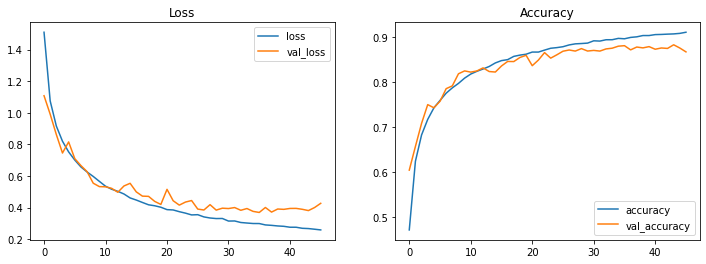

In [ ]:
run_model()

In [1]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
from tensorflow.keras import datasets

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel the value between 1 and 0
X_train, X_test = X_train / 255.0, X_test / 255.0

# one hot encoding or format accepted by tensorflow - vector structure.
y_train, y_test = y_train.flatten(), y_test.flatten()

model = load_model('drive/MyDrive/3014397_ITNPAI1/data_augmentation_dropout_batch_normalization_final_model.h5')

170508288/170498071 [==============================] - 4s 0us/step


In [2]:
result = model.predict(X_test)
y_prediction = np.argmax(result,axis=1)
y_prediction[:5]

array([3, 8, 8, 0, 6])

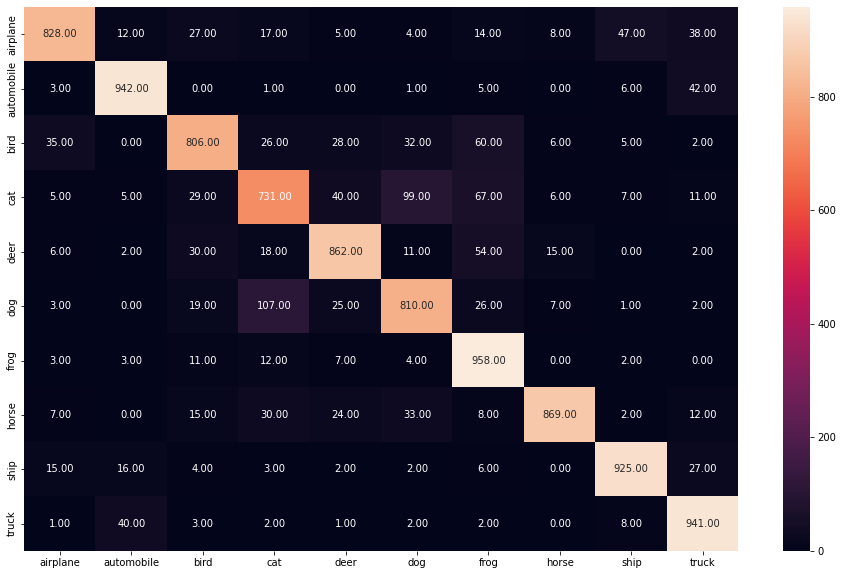

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='.2f',  xticklabels=class_names, yticklabels = class_names)

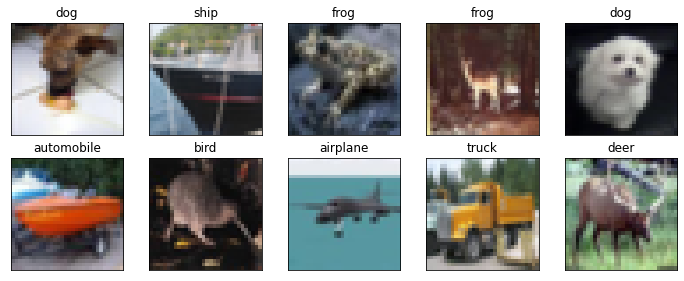

In [25]:
from IPython.core.pylabtools import figsize
import random
def predict_and_plot():
    plt.figure(figsize=(12, 12))

    # Predicting the random images 
    for k in range(10):
        random_number = random.randint(0, len(X_test))
        img = (X_test[random_number].reshape(1, 32, 32, 3)).astype('float32')
        result = model.predict(img)
        class_num = np.argmax(result,axis=1)
        plt.subplot(5,5,k+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[random_number])
        plt.title(class_names[int(class_num)], fontsize=12)

predict_and_plot()